<a href="https://colab.research.google.com/github/Sreetam/probable-parakeet/blob/main/News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
import matplotlib.pyplot as plt

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from dateutil.parser import parse
import time
import re

In [3]:
%%time
mins = 60 * 1
articles = []
rss_list = pd.read_csv('https://raw.githubusercontent.com/Sreetam/probable-parakeet/main/rss.csv')
interests = ['general', 'politics']
countries = ['US', 'IN', 'GB']

rss_list = rss_list.loc[rss_list.category.isin(interests)]
rss_list = rss_list.loc[rss_list.country.isin(countries)]

for rss in rss_list['rss-url']:
  try:
    for i in range(5):
      r = requests.get(rss, timeout=0.5)
      if r.status_code==200:
        break
    soupContent = BeautifulSoup(r.content,features='xml')
    items = soupContent.findAll('item')
    if r.status_code==200 and len(items)!=0:
      print('Total News Content: ' + str(len(items)) + ' : Success: ' + str(r.status_code) + " : " + rss)
    else:
      print('Total News Content: 0 : Fail: ' + str(r.status_code) + ' : ' + rss)
      continue
  except:
    print('Total News Content: 0 : Fail: 404 : ' + rss)
    continue
  for i in items:
    article = []
    try:
      date = i.find('pubDate').text
      stamp = parse(date, fuzzy=True).timestamp()
      if stamp>=time.time() - mins*60:
        article.append(date)
        article.append(stamp)
      else:
        continue
    except:
       continue
    try: article.append(re.sub("<.+?>", " ", i.find('title').text).strip())
    except: continue
    try: article.append(re.sub("<.+?>", " ", i.find('description').text).strip())
    except: continue
    try: article.append(i.find('link').text.strip())
    except: continue
    article.append(rss)
    articles.append(article)
col = ['pubDate', 'timestamp', 'title', 'description', 'link', 'rss-url']
news = pd.DataFrame(articles, columns=col).drop_duplicates().dropna()
news = news.sort_values(by='timestamp', ascending=False)
news = pd.merge(news, rss_list, how='inner', on='rss-url')
col = news.columns

Total News Content: 25 : Success: 200 : http://feeds.abcnews.com/abcnews/usheadlines
Total News Content: 69 : Success: 200 : http://rss.cnn.com/rss/cnn_topstories.rss
Total News Content: 30 : Success: 200 : http://www.cbsnews.com/latest/rss/main
Total News Content: 20 : Success: 200 : http://rss.csmonitor.com/feeds/usa
Total News Content: 25 : Success: 200 : http://feeds.nbcnews.com/feeds/topstories
Total News Content: 25 : Success: 200 : http://feeds.nbcnews.com/feeds/worldnews
Total News Content: 31 : Success: 200 : http://www.huffingtonpost.com/feeds/verticals/world/index.xml
Total News Content: 39 : Success: 200 : http://feeds.bbci.co.uk/news/world/us_and_canada/rss.xml
Total News Content: 50 : Success: 200 : http://news.yahoo.com/rss/us
Total News Content: 50 : Success: 200 : http://rss.news.yahoo.com/rss/world
Total News Content: 51 : Success: 200 : http://qz.com/feed
Total News Content: 30 : Success: 200 : http://www.theguardian.com/world/usa/rss
Total News Content: 50 : Success

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Total News Content: 30 : Success: 200 : http://www.salon.com/category/news/feed/rss/
Total News Content: 10 : Success: 200 : http://time.com/newsfeed/feed/
Total News Content: 10 : Success: 200 : http://feeds.foxnews.com/foxnews/latest?format=xml
Total News Content: 30 : Success: 200 : http://www.politico.com/rss/magazine.xml
Total News Content: 10 : Success: 200 : http://www.politico.com/rss/Top10Blogs.xml


/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Total News Content: 31 : Success: 200 : http://www.huffingtonpost.com/feeds/verticals/politics/index.xml
Total News Content: 30 : Success: 200 : http://rss.cnn.com/rss/cnn_allpolitics.rss
Total News Content: 20 : Success: 200 : http://rss.nytimes.com/services/xml/rss/nyt/Politics.xml
Total News Content: 20 : Success: 200 : http://rss.nytimes.com/services/xml/rss/nyt/Upshot.xml
Total News Content: 20 : Success: 200 : http://thecaucus.blogs.nytimes.com/feed/
Total News Content: 10 : Success: 200 : http://www.rollcall.com/rss/all_news.xml
Total News Content: 50 : Success: 200 : http://www.thenation.com/rss/articles
Total News Content: 20 : Success: 200 : http://www.washingtontimes.com/rss/headlines/news/politics/
Total News Content: 20 : Success: 200 : http://dailycaller.com/section/politics/feed/
Total News Content: 20 : Success: 200 : https://www.nationalreview.com/rss.xml
Total News Content: 61 : Success: 200 : http://feeds.feedburner.com/DrudgeReportFeed
Total News Content: 50 : Succe

In [4]:
news

,pubDate,timestamp,title,description,link,rss-url,country,category
0,"Sat, 17 Sep 2022 19:47:08 -0400",1.663458e+09,Sheriff: 2 small planes collide mid-air near D...,Colorado authorities say three people are dead...,https://abcnews.go.com/US/wireStory/sheriff-sm...,http://feeds.abcnews.com/abcnews/usheadlines,US,general
1,"Sat, 17 Sep 2022 19:19:24 -0400",1.663457e+09,California enacts law to help LGBTQ military v...,Law will help people who were discharged under...,https://abcnews.go.com/US/wireStory/california...,http://feeds.abcnews.com/abcnews/usheadlines,US,general
2,"Sat, 17 Sep 2022 19:42:21 -0400",1.663458e+09,Matt Gaetz Sought Preemptive Pardon In Sex Tra...,"Gaetz said he ""didn't to anything wrong"" but ...",https://www.huffpost.com/entry/matt-gaetz-sex-...,http://www.huffingtonpost.com/feeds/verticals/...,US,politics
3,"Sat, 17 Sep 2022 23:34:57 GMT",1.663458e+09,Australia live news update: Albanese meets Kin...,Downing Street frames conversation between Aus...,https://www.theguardian.com/australia-news/liv...,http://www.theguardian.com/world/rss,GB,general
4,"Sat, 17 Sep 2022 23:05:08 GMT",1.663456e+09,Biggest interest rate rise for 25 years could ...,This week’s decision could pit Bank of England...,https://www.theguardian.com/business/2022/sep/...,http://www.theguardian.com/world/rss,GB,general
...,...,...,...,...,...,...,...,...
111,"Sat, 17 Sep 2022 19:02:22 -0400",1.663456e+09,Suspect charged in stabbing of 2 London police...,The incident comes as London is flooded with m...,https://www.cbsnews.com/news/london-police-off...,http://www.cbsnews.com/latest/rss/main,US,general
112,"Sat, 17 Sep 2022 23:01:43 GMT",1.663456e+09,Truss to meet Irish counterpart as talks with ...,The PM’s meeting with Taoiseach Micheal Martin...,https://www.standard.co.uk/news/politics/liz-t...,http://www.standard.co.uk/news/politics/rss,GB,politics
113,"\n Sun, 18 Sep 2022 04:31:22 +0530\n",1.663456e+09,Dilution of Article 370 left deep scar on J&am...,“Our party will make relentless efforts to res...,https://www.thehindu.com/news/national/other-s...,http://www.thehindu.com/news/national/?service...,IN,general
114,"\n Sun, 18 Sep 2022 04:31:22 +0530\n",1.663456e+09,Dilution of Article 370 left deep scar on J&am...,“Our party will make relentless efforts to res...,https://www.thehindu.com/news/national/other-s...,http://www.thehindu.com/news/national/?service...,IN,politics


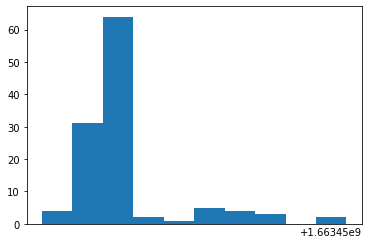

In [5]:
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.hist(news.timestamp)
plt.show() 

In [6]:
# !pip install git+https://github.com/boudinfl/pke.git
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader import wordlist
stop_words = set(stopwords.words('english'))
import pke
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
%%time

def pre_process(text):
  text = text.lower()
  text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
  # remove special characters and digits
  text=re.sub("(\\d|\\W)+"," ",text)
  # Convert to list from string
  word_list = text.split()
  # remove words less than three letters
  word_list = [word for word in word_list if len(word) >= 3 and word not in stop_words]
  # lemmatize
  lmtzr = WordNetLemmatizer()
  lemmatized_list = [lmtzr.lemmatize(word) for word in word_list]
  viral_tags = nltk.pos_tag(lemmatized_list)
  viral = [i[0] for i in viral_tags if i[1] in ['NN','NNS', 'NNP', 'NNPS']]
  return set(viral)

def extract(text):
  # define the set of valid Part-of-Speeches
  pos = {'NOUN', 'PROPN', 'ADJ'}
  # create a SingleRank extractor.
  extractor = pke.unsupervised.SingleRank()
  # load the content of the document.
  extractor.load_document(input=text, language='en', normalization=None)
  # select the longest sequences of nouns and adjectives as candidates.
  extractor.candidate_selection(pos=pos)
  # weight the candidates using the sum of their word's scores that are
  # computed using random walk. In the graph, nodes are words of
  # certain part-of-speech (nouns and adjectives) that are connected if
  # they occur in a window of 10 words.
  extractor.candidate_weighting(window=10, pos=pos)
  # get the 10-highest scored candidates as keyphrases
  keyphrases = extractor.get_n_best(n=10)
  return [i[0] for i in keyphrases]

news['keyphrases'] = news['description'].apply(lambda x:extract(x))
news['key_words'] = news['keyphrases'].apply(lambda x:pre_process(' '.join(x)))

CPU times: user 1min 41s, sys: 2.75 s, total: 1min 44s
Wall time: 1min 45s


In [10]:
%%time

corpora = []
for i in news.loc[news.country=='IN']['key_words']:
  corpora = corpora + list(i)

counts = Counter(corpora)
labels, values = zip(*counts.items())
indSort = np.argsort(values)[::-1]
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))
trending = labels[int(len(labels)*0.02):int(len(labels)*0.5)]
trending

CPU times: user 2.56 ms, sys: 0 ns, total: 2.56 ms
Wall time: 11.6 ms


array(['leader', 'yousuf', 'mohamad', 'effort', 'relentless'],
      dtype='<U10')

In [9]:
news.loc[news.country=='IN']

,pubDate,timestamp,title,description,link,rss-url,country,category,keyphrases,key_words
47,"Sat, 17 Sep 2022 23:08:39 +0000",1.663456e+09,Need a rethink on collegium system: Kiren Rijiju,,https://indianexpress.com/article/india/need-a...,http://indianexpress.com/section/india/feed/,IN,general,[],{}
113,"\n Sun, 18 Sep 2022 04:31:22 +0530\n",1.663456e+09,Dilution of Article 370 left deep scar on J&am...,“Our party will make relentless efforts to res...,https://www.thehindu.com/news/national/other-s...,http://www.thehindu.com/news/national/?service...,IN,general,"[leader mohamad yousuf tarigami, constitutiona...","{party, cpi, relentless, effort, mohamad, yous..."
114,"\n Sun, 18 Sep 2022 04:31:22 +0530\n",1.663456e+09,Dilution of Article 370 left deep scar on J&am...,“Our party will make relentless efforts to res...,https://www.thehindu.com/news/national/other-s...,http://www.thehindu.com/news/national/?service...,IN,politics,"[leader mohamad yousuf tarigami, constitutiona...","{party, cpi, relentless, effort, mohamad, yous..."
115,"\n Sun, 18 Sep 2022 04:26:41 +0530\n",1.663455e+09,Crude bomb explosion rocks a school in WB,The incident occurred at about 11.45 a.m. when...,https://www.thehindu.com/news/cities/kolkata/c...,http://www.thehindu.com/news/cities/?service=rss,IN,politics,"[titagarh high school, underway, classes, a.m....","{class, school, incident}"
